In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor  # Utilisez KNeighborsClassifier pour la classification

import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [137]:
pd.options.display.max_columns = 45            #just extending the number  of columns that can be seen
pd.options.display.max_colwidth = 120  

In [138]:
# load json as a dataframe with pandas
data = pd.read_json("data/final_dataset.json")

In [139]:
data.columns

Index(['Url', 'BathroomCount', 'BedroomCount', 'ConstructionYear', 'Country',
       'District', 'Fireplace', 'FloodingZone', 'Furnished', 'Garden',
       'GardenArea', 'Kitchen', 'LivingArea', 'Locality', 'MonthlyCharges',
       'NumberOfFacades', 'PEB', 'PostalCode', 'Price', 'PropertyId',
       'Province', 'Region', 'RoomCount', 'ShowerCount', 'StateOfBuilding',
       'SubtypeOfProperty', 'SurfaceOfPlot', 'SwimmingPool', 'Terrace',
       'ToiletCount', 'TypeOfProperty', 'TypeOfSale'],
      dtype='object')

In [140]:
data.head(20)

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
2,https://www.immoweb.be/en/classified/apartment/for-sale/zeebrugge/8380/10957010,1.0,1,1969.0,Belgium,Brugge,NaN,None,NaN,NaN,NaN,None,29.0,Zeebrugge,NaN,NaN,None,8380,99000,10957010,West Flanders,Flanders,1.0,0.0,GOOD,flat_studio,NaN,NaN,1.0,1.0,2,residential_sale
6,https://www.immoweb.be/en/classified/house/for-sale/tournai/7500/10956841,6.0,13,1920.0,Belgium,Tournai,NaN,None,0.0,NaN,NaN,None,391.0,Tournai,NaN,3.0,D,7500,765000,10956841,Hainaut,Wallonie,31.0,NaN,GOOD,apartment_block,130.0,NaN,NaN,5.0,1,residential_sale
8,https://www.immoweb.be/en/classified/house/for-sale/blankenberge/8370/10956807,2.0,4,2008.0,Belgium,Brugge,NaN,NON_FLOOD_ZONE,1.0,NaN,NaN,INSTALLED,111.0,BLANKENBERGE,NaN,2.0,B,8370,399000,10956807,West Flanders,Flanders,NaN,0.0,GOOD,house,0.0,NaN,NaN,2.0,1,residential_sale
10,https://www.immoweb.be/en/classified/house/for-sale/de-panne/8660/10956664,1.0,4,NaN,Belgium,Veurne,NaN,None,NaN,1.0,1.0,None,NaN,De Panne,NaN,2.0,F,8660,230000,10956664,West Flanders,Flanders,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1,residential_sale
11,https://www.immoweb.be/en/classified/apartment/for-sale/hasselt/3500/10956668,0.0,2,1972.0,Belgium,Hasselt,NaN,NON_FLOOD_ZONE,NaN,NaN,NaN,None,92.0,Hasselt,NaN,NaN,B,3500,198000,10956668,Limburg,Flanders,1.0,0.0,AS_NEW,apartment,NaN,NaN,1.0,1.0,2,residential_sale
14,https://www.immoweb.be/en/classified/apartment/for-sale/schaerbeek/1030/10956614,1.0,1,1994.0,Belgium,Brussels,NaN,None,1.0,NaN,NaN,HYPER_EQUIPPED,50.0,Schaerbeek,NaN,2.0,E,1030,215000,10956614,Brussels,Brussels,NaN,NaN,AS_NEW,apartment,NaN,0.0,1.0,1.0,2,residential_sale
15,https://www.immoweb.be/en/classified/house/for-rent/waterloo/1410/10956598,4.0,6,1970.0,Belgium,Nivelles,1.0,NON_FLOOD_ZONE,NaN,1.0,2519.0,INSTALLED,425.0,WATERLOO,0.0,4.0,C,1410,5500,10956598,Walloon Brabant,Wallonie,NaN,0.0,GOOD,villa,2519.0,NaN,1.0,5.0,1,residential_monthly_rent
18,https://www.immoweb.be/en/classified/house/for-sale/putte/2580/10956546,0.0,2,NaN,Belgium,Mechelen,NaN,NON_FLOOD_ZONE,NaN,NaN,NaN,None,NaN,Putte,NaN,3.0,F,2580,235000,10956546,Antwerp,Flanders,1.0,0.0,None,house,423.0,NaN,NaN,0.0,1,residential_sale
22,https://www.immoweb.be/en/classified/apartment/for-sale/vilvoorde/1800/10956452,2.0,3,2023.0,Belgium,Halle-Vilvoorde,NaN,None,NaN,NaN,NaN,None,NaN,Vilvoorde,NaN,3.0,A,1800,485000,10956452,Flemish Brabant,Flanders,NaN,0.0,None,apartment,NaN,0.0,NaN,NaN,2,residential_sale
23,https://www.immoweb.be/en/classified/apartment/for-sale/temse/9140/10956305,NaN,2,NaN,Belgium,Sint-Niklaas,NaN,None,NaN,NaN,NaN,None,101.0,Temse,NaN,NaN,None,9140,320000,10956305,East Flanders,Flanders,NaN,0.0,None,apartment,NaN,NaN,NaN,NaN,2,residential_sale


In [141]:
data.describe()

,BathroomCount,BedroomCount,ConstructionYear,Fireplace,Furnished,Garden,GardenArea,LivingArea,MonthlyCharges,NumberOfFacades,PostalCode,Price,PropertyId,RoomCount,ShowerCount,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty
count,109112.000000,118714.000000,68898.000000,4123.0,30325.000000,22503.0,2.250300e+04,104539.000000,13650.000000,76942.000000,118714.000000,1.187140e+05,1.187140e+05,32916.000000,57127.000000,5.823700e+04,40358.000000,68344.0,9.644100e+04,118714.000000
mean,1.232898,2.708383,1987.345496,1.0,0.070041,1.0,4.509960e+04,167.396417,84.239853,2.791557,5166.113129,3.815797e+05,1.245875e+07,6.806538,0.696186,3.118253e+03,0.050994,1.0,4.120696e+01,1.509460
std,1.092045,1.855343,47.311922,0.0,0.255221,0.0,6.666220e+06,1814.592952,179.608171,0.872792,3060.657713,4.754330e+05,3.131297e+06,5.458941,6.563612,4.776406e+05,0.219987,0.0,1.234059e+04,0.499913
min,0.000000,0.000000,1753.000000,1.0,0.000000,1.0,1.000000e+00,9.000000,0.000000,1.000000,0.000000,1.000000e+00,1.882546e+06,1.000000,0.000000,0.000000e+00,0.000000,1.0,0.000000e+00,1.000000
25%,1.000000,2.000000,1964.000000,1.0,0.000000,1.0,4.800000e+01,90.000000,0.000000,2.000000,2250.000000,2.000000e+05,1.114592e+07,2.000000,0.000000,1.480000e+02,0.000000,1.0,1.000000e+00,1.000000
50%,1.000000,3.000000,2000.000000,1.0,0.000000,1.0,1.400000e+02,124.000000,30.000000,3.000000,4671.000000,3.095000e+05,1.138077e+07,6.000000,0.000000,3.530000e+02,0.000000,1.0,1.000000e+00,2.000000
75%,1.000000,3.000000,2023.000000,1.0,0.000000,1.0,4.500000e+02,182.000000,120.000000,4.000000,8400.000000,4.390000e+05,1.146776e+07,10.000000,1.000000,8.000000e+02,0.000000,1.0,2.000000e+00,2.000000
max,145.000000,200.000000,8071.000000,1.0,1.000000,1.0,1.000000e+09,452230.000000,5250.000000,24.000000,9992.000000,3.500000e+07,2.002586e+07,68.000000,1120.000000,1.152500e+08,1.000000,1.0,3.832365e+06,2.000000


In [142]:
data.shape

(118714, 32)

In [143]:
postal_codes_to_keep = pd.read_csv('data/postalcode_be.csv')

In [144]:
postal_codes_to_keep_list = postal_codes_to_keep['Code postal'].tolist()

In [145]:
data = data[data['PostalCode'].isin(postal_codes_to_keep_list)]

In [146]:
data.shape

(118707, 32)

In [147]:
data.drop_duplicates("PropertyId",inplace=True)
data.drop(data[data.ConstructionYear > 2033].index,inplace=True)
data.drop(data[data.PostalCode < 1000].index,inplace=True)
data.drop(data[data.GardenArea > 200000].index,inplace=True)
data.drop(data[data.LivingArea > 4500].index, inplace=True)
data.drop(data[data.Price > 4000000].index,inplace=True)
data.drop(data[data.NumberOfFacades > 8].index,inplace=True)
data.drop(data[data.ShowerCount > 58].index,inplace=True)
data.drop(data[data.SurfaceOfPlot > 200000].index,inplace=True)
data.drop(data[data.ToiletCount > 25].index,inplace=True)
data.drop(data[data.District == None].index,inplace=True)
data.drop(data[data.Province == None].index,inplace=True)
data.drop(data[data.Region == None].index,inplace=True)
data.drop(data[data.Locality == None].index,inplace=True)


In [148]:
data.dtypes[data.dtypes != 'object']

BathroomCount       float64
BedroomCount          int64
ConstructionYear    float64
Fireplace           float64
Furnished           float64
Garden              float64
GardenArea          float64
LivingArea          float64
MonthlyCharges      float64
NumberOfFacades     float64
PostalCode            int64
Price                 int64
PropertyId            int64
RoomCount           float64
ShowerCount         float64
SurfaceOfPlot       float64
SwimmingPool        float64
Terrace             float64
ToiletCount         float64
TypeOfProperty        int64
dtype: object

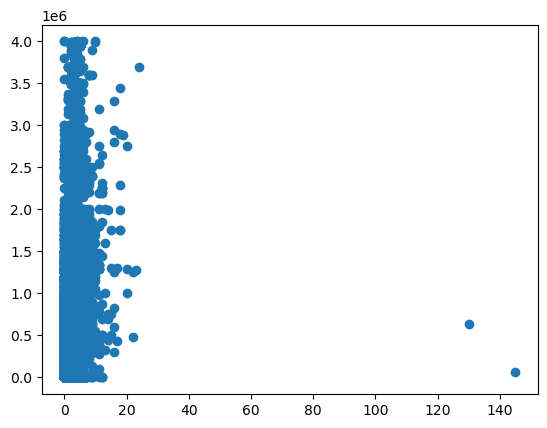

In [149]:
plt.scatter(x='BathroomCount', y='Price', data=data)

In [150]:
data.query('BathroomCount > 10')

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
1271,https://www.immoweb.be/en/classified/house/for-sale/bastogne/6600/10940526,18.0,19,1874.0,Belgium,Bastogne,NaN,NON_FLOOD_ZONE,1.0,1.0,28870.0,HYPER_EQUIPPED,1560.0,Bastogne,NaN,4.0,D,6600,1750000,10940526,Luxembourg,Wallonie,NaN,18.0,GOOD,castle,28870.0,0.0,1.0,20.0,1,residential_sale
1273,https://www.immoweb.be/en/classified/house/for-sale/fauvillers/6637/10940525,18.0,19,1874.0,Belgium,Bastogne,NaN,NON_FLOOD_ZONE,1.0,1.0,28870.0,HYPER_EQUIPPED,1560.0,Fauvillers,NaN,4.0,D,6637,1750000,10940525,Luxembourg,Wallonie,NaN,18.0,GOOD,house,28870.0,0.0,1.0,20.0,1,residential_sale
1416,https://www.immoweb.be/en/classified/apartment/for-sale/mons/7000/10937755,11.0,16,2013.0,Belgium,Mons,NaN,NON_FLOOD_ZONE,0.0,NaN,NaN,INSTALLED,NaN,Mons,NaN,4.0,B,7000,2200000,10937755,Hainaut,Wallonie,NaN,NaN,GOOD,apartment,NaN,0.0,1.0,NaN,2,residential_sale
3673,https://www.immoweb.be/en/classified/house/for-sale/mons/7000/10912111,11.0,16,2013.0,Belgium,Mons,NaN,NON_FLOOD_ZONE,0.0,NaN,NaN,INSTALLED,NaN,Mons,NaN,4.0,B,7000,2200000,10912111,Hainaut,Wallonie,NaN,NaN,GOOD,apartment_block,0.0,0.0,1.0,NaN,1,residential_sale
8954,https://www.immoweb.be/en/classified/apartment/for-sale/zandhoven/2240/10890954,22.0,3,NaN,Belgium,Antwerp,NaN,NON_FLOOD_ZONE,0.0,NaN,NaN,HYPER_EQUIPPED,133.0,Zandhoven,NaN,4.0,None,2240,479000,10890954,Antwerp,Flanders,NaN,NaN,GOOD,penthouse,NaN,NaN,1.0,NaN,2,residential_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160622,https://www.immoweb.be/en/classified/house/for-sale/frameries/7080/9684855,11.0,11,NaN,Belgium,Mons,NaN,None,0.0,NaN,NaN,INSTALLED,500.0,Frameries,NaN,2.0,D,7080,1295000,9684855,Hainaut,Wallonie,NaN,NaN,None,apartment_block,210.0,NaN,NaN,NaN,1,residential_sale
169772,https://www.immoweb.be/en/classified/apartment/for-rent/schaerbeek/1030/8741518,11.0,12,NaN,Belgium,Brussels,NaN,None,NaN,1.0,70.0,HYPER_EQUIPPED,450.0,Schaerbeek,0.0,NaN,None,1030,840,8741518,Brussels,Brussels,NaN,11.0,JUST_RENOVATED,flat_studio,NaN,NaN,NaN,NaN,2,residential_monthly_rent
170334,https://www.immoweb.be/en/classified/house/for-sale/marcinelle/6001/10313320,20.0,20,NaN,Belgium,Charleroi,NaN,None,0.0,NaN,NaN,INSTALLED,NaN,MARCINELLE,NaN,3.0,C,6001,999999,10313320,Hainaut,Wallonie,NaN,20.0,GOOD,apartment_block,1795.0,0.0,NaN,20.0,1,residential_sale
171643,https://www.immoweb.be/en/classified/house/for-sale/orchimont/5550/10484514,13.0,18,NaN,Belgium,Dinant,NaN,NON_FLOOD_ZONE,1.0,NaN,NaN,None,1500.0,Orchimont,NaN,4.0,None,5550,1600000,10484514,Namur,Wallonie,NaN,0.0,AS_NEW,exceptional_property,19958.0,NaN,NaN,NaN,1,residential_sale


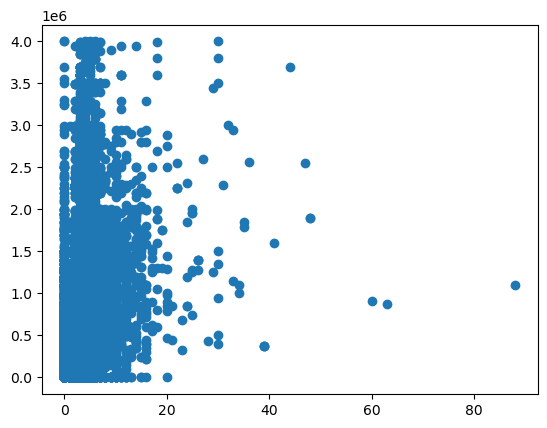

In [151]:
plt.scatter(x='BedroomCount', y='Price', data=data)

In [152]:
data.query('BedroomCount > 50')

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
30677,https://www.immoweb.be/en/classified/house/for-sale/brussels/1000/11490449,NaN,60,NaN,Belgium,Brussels,NaN,None,NaN,NaN,NaN,None,NaN,Brussels,NaN,3.0,None,1000,915000,11490449,Brussels,Brussels,NaN,NaN,GOOD,house,0.0,NaN,NaN,NaN,1,residential_sale
38018,https://www.immoweb.be/en/classified/house/for-sale/verviers/4800/11481911,NaN,63,1920.0,Belgium,Verviers,NaN,None,NaN,NaN,NaN,None,2378.0,Verviers,NaN,3.0,None,4800,875000,11481911,Liège,Wallonie,NaN,NaN,TO_BE_DONE_UP,house,1232.0,0.0,1.0,NaN,1,residential_sale
96357,https://www.immoweb.be/en/classified/house/for-sale/schaerbeek/1030/11313431,NaN,88,1991.0,Belgium,Brussels,NaN,None,NaN,NaN,NaN,None,NaN,Schaerbeek,NaN,2.0,None,1030,1100000,11313431,Brussels,Brussels,NaN,NaN,None,house,0.0,0.0,NaN,NaN,1,residential_sale


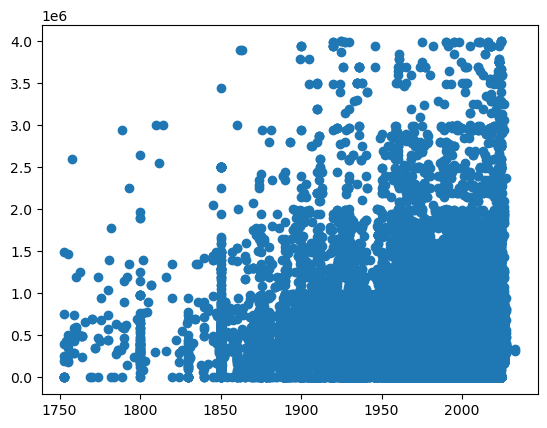

In [153]:
plt.scatter(x='ConstructionYear', y='Price', data=data)

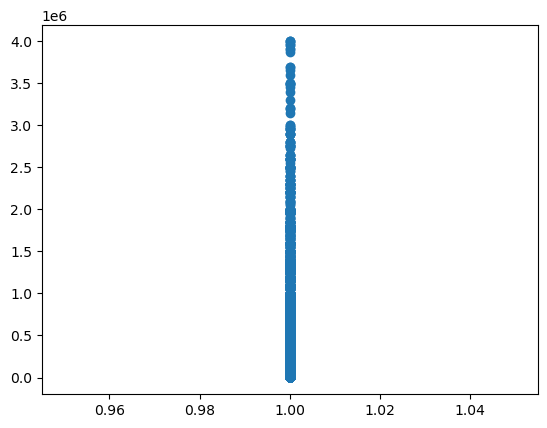

In [154]:
plt.scatter(x='Fireplace', y='Price', data=data)

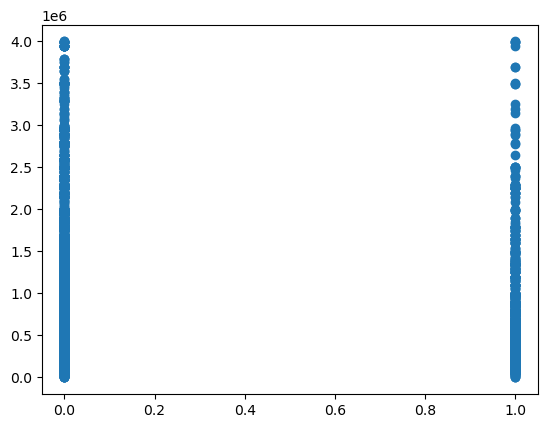

In [155]:
plt.scatter(x='Furnished', y='Price', data=data)

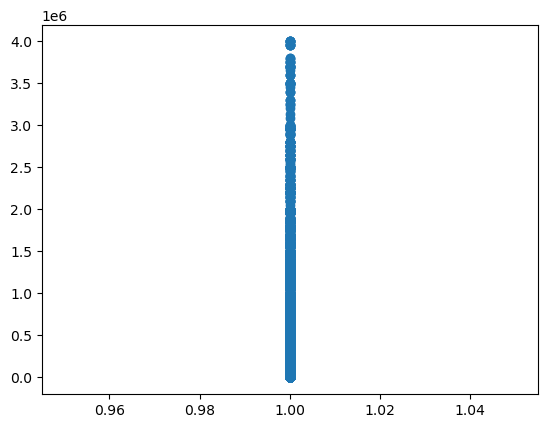

In [156]:
plt.scatter(x='Garden', y='Price', data=data)

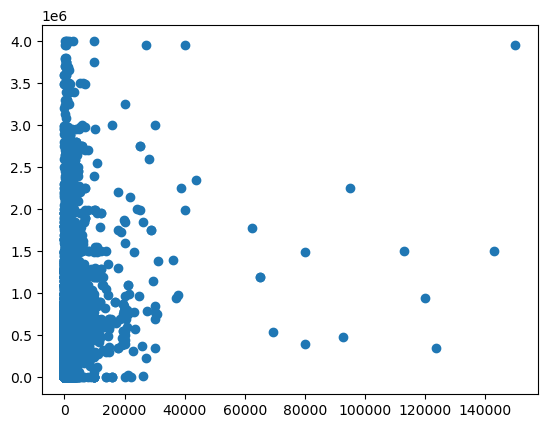

In [157]:
plt.scatter(x='GardenArea', y='Price', data=data)

In [158]:
data.query('GardenArea > 40000')

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
25624,https://www.immoweb.be/en/classified/house/for-sale/rijkevorsel/2310/10846568,4.0,6,1886.0,Belgium,Turnhout,1.0,NON_FLOOD_ZONE,NaN,1.0,62490.0,None,585.0,Rijkevorsel,NaN,4.0,F,2310,1775000,10846568,Antwerp,Flanders,NaN,0.0,None,villa,62490.0,NaN,1.0,7.0,1,residential_sale
25625,https://www.immoweb.be/en/classified/house/for-sale/essen/2910/10846563,4.0,4,1890.0,Belgium,Antwerp,NaN,NON_FLOOD_ZONE,NaN,1.0,43825.0,None,486.0,Essen,NaN,4.0,B,2910,2350000,10846563,Antwerp,Flanders,NaN,0.0,None,villa,43825.0,NaN,NaN,0.0,1,residential_sale
27176,https://www.immoweb.be/en/classified/house/for-sale/pondrome/5574/10815433,1.0,4,1973.0,Belgium,Dinant,NaN,None,0.0,1.0,120000.0,INSTALLED,263.0,PONDROME,NaN,4.0,F,5574,950000,10815433,Namur,Wallonie,NaN,1.0,None,house,129299.0,0.0,1.0,1.0,1,residential_sale
45286,https://www.immoweb.be/en/classified/house/for-sale/scherpenheuvel-zichem/3270/20005790,1.0,3,2024.0,Belgium,Leuven,NaN,NON_FLOOD_ZONE,0.0,1.0,92828.0,HYPER_EQUIPPED,185.0,Scherpenheuvel-Zichem,NaN,4.0,None,3270,485000,20005790,Flemish Brabant,Flanders,NaN,NaN,GOOD,house,1019.0,NaN,1.0,2.0,1,residential_sale
65707,https://www.immoweb.be/en/classified/house/for-sale/marche-en-famenne/6900/11440408,0.0,3,1850.0,Belgium,Marche-en-Famenne,NaN,NON_FLOOD_ZONE,0.0,1.0,69558.0,NOT_INSTALLED,400.0,Marche-en-Famenne,NaN,4.0,G,6900,545000,11440408,Luxembourg,Wallonie,NaN,1.0,TO_RESTORE,house,69558.0,0.0,1.0,1.0,1,residential_sale
67362,https://www.immoweb.be/en/classified/house/for-sale/zoersel/2980/11397756,2.0,2,NaN,Belgium,Antwerp,NaN,None,NaN,1.0,143000.0,None,148.0,Zoersel,NaN,4.0,C,2980,1500000,11397756,Antwerp,Flanders,NaN,NaN,JUST_RENOVATED,house,143179.0,NaN,1.0,NaN,1,residential_sale
85875,https://www.immoweb.be/en/classified/house/for-sale/wavre/1300/11413128,4.0,5,1977.0,Belgium,Nivelles,1.0,NON_FLOOD_ZONE,NaN,1.0,112982.0,HYPER_EQUIPPED,392.0,Wavre,NaN,4.0,C,1300,1500000,11413128,Walloon Brabant,Wallonie,NaN,NaN,AS_NEW,villa,12982.0,1.0,1.0,NaN,1,residential_sale
90816,https://www.immoweb.be/en/classified/house/for-sale/kasterlee/2460/11448003,2.0,4,2014.0,Belgium,Turnhout,NaN,NON_FLOOD_ZONE,1.0,1.0,123456.0,INSTALLED,60.0,Kasterlee,NaN,4.0,None,2460,350000,11448003,Antwerp,Flanders,NaN,1.0,AS_NEW,chalet,8000.0,0.0,1.0,2.0,1,residential_sale
117363,https://www.immoweb.be/en/classified/house/for-sale/grimbergen/1850/11366667,6.0,10,NaN,Belgium,Halle-Vilvoorde,NaN,None,NaN,1.0,95000.0,INSTALLED,850.0,Grimbergen,NaN,4.0,None,1850,2250000,11366667,Flemish Brabant,Flanders,10.0,NaN,TO_BE_DONE_UP,castle,95000.0,0.0,1.0,NaN,1,residential_sale
123217,https://www.immoweb.be/en/classified/house/for-sale/winksele/3020/11343599,3.0,6,1927.0,Belgium,Leuven,1.0,NON_FLOOD_ZONE,NaN,1.0,64926.0,None,856.0,WINKSELE,NaN,4.0,F,3020,1200000,11343599,Flemish Brabant,Flanders,NaN,0.0,None,mixed_use_building,18814.0,NaN,1.0,7.0,1,residential_sale


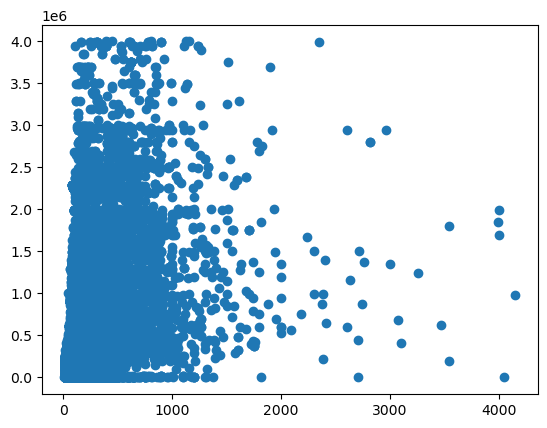

In [159]:
plt.scatter(x='LivingArea', y='Price', data=data)

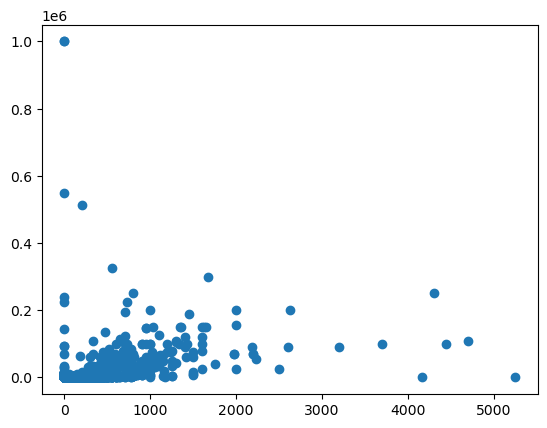

In [160]:
plt.scatter(x='MonthlyCharges', y='Price', data=data)

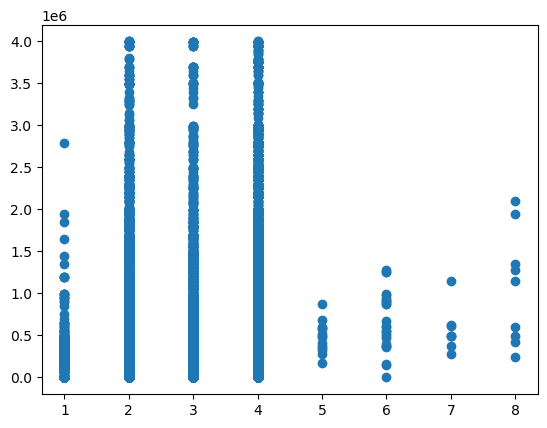

In [161]:
plt.scatter(x='NumberOfFacades', y='Price', data=data)

In [162]:
data.query('NumberOfFacades > 7')

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
34957,https://www.immoweb.be/en/classified/house/for-sale/brasschaat/2930/11484870,3.0,4,NaN,Belgium,Antwerp,1.0,NON_FLOOD_ZONE,NaN,1.0,4500.0,HYPER_EQUIPPED,753.0,Brasschaat,NaN,8.0,None,2930,2100000,11484870,Antwerp,Flanders,NaN,NaN,AS_NEW,villa,5335.0,1.0,1.0,6.0,1,residential_sale
47554,https://www.immoweb.be/en/classified/house/for-sale/walcourt/5651/11477545,2.0,4,2004.0,Belgium,Philippeville,1.0,NON_FLOOD_ZONE,NaN,1.0,2000.0,USA_HYPER_EQUIPPED,400.0,Walcourt,NaN,8.0,C,5651,595000,11477545,Namur,Wallonie,NaN,NaN,AS_NEW,exceptional_property,2000.0,0.0,1.0,3.0,1,residential_sale
58767,https://www.immoweb.be/en/classified/house/for-sale/blegny/4670/11470096,3.0,5,NaN,Belgium,Liège,1.0,NON_FLOOD_ZONE,0.0,1.0,11556.0,INSTALLED,481.0,Blégny,NaN,8.0,C,4670,1280000,11470096,Liège,Wallonie,31.0,NaN,GOOD,exceptional_property,11556.0,0.0,1.0,4.0,1,residential_sale
69964,https://www.immoweb.be/en/classified/house/for-sale/bocholt/3950/11388056,1.0,4,1966.0,Belgium,Maaseik,NaN,NON_FLOOD_ZONE,NaN,1.0,620.0,INSTALLED,155.0,Bocholt,NaN,8.0,F,3950,249000,11388056,Limburg,Flanders,NaN,NaN,TO_BE_DONE_UP,house,770.0,0.0,1.0,1.0,1,residential_sale
76112,https://www.immoweb.be/en/classified/apartment/for-sale/neupre/4122/11430307,1.0,2,2024.0,Belgium,Liège,NaN,NON_FLOOD_ZONE,NaN,1.0,1000.0,INSTALLED,NaN,Neupré,NaN,8.0,A+,4122,420000,11430307,Liège,Wallonie,5.0,1.0,None,apartment,NaN,0.0,1.0,1.0,2,residential_sale
103669,https://www.immoweb.be/en/classified/house/for-sale/keerbergen/3140/11214978,3.0,5,1972.0,Belgium,Leuven,1.0,POSSIBLE_FLOOD_ZONE,NaN,1.0,6620.0,INSTALLED,577.0,Keerbergen,NaN,8.0,C,3140,1348000,11214978,Flemish Brabant,Flanders,NaN,1.0,AS_NEW,house,6620.0,1.0,1.0,4.0,1,residential_sale
115672,https://www.immoweb.be/en/classified/house/for-sale/kortrijk/8500/11191113,0.0,3,NaN,Belgium,Kortrijk,NaN,NON_FLOOD_ZONE,NaN,1.0,80.0,None,333.0,Kortrijk,NaN,8.0,C,8500,495000,11191113,West Flanders,Flanders,1.0,0.0,None,house,600.0,NaN,NaN,0.0,1,residential_sale
117839,https://www.immoweb.be/en/classified/house/for-sale/veurne/8630/11364989,2.0,4,1890.0,Belgium,Veurne,NaN,POSSIBLE_FLOOD_ZONE,NaN,1.0,1.0,INSTALLED,350.0,Veurne,NaN,8.0,B,8630,1150000,11364989,West Flanders,Flanders,NaN,2.0,GOOD,country_cottage,5657.0,1.0,1.0,2.0,1,residential_sale
119130,https://www.immoweb.be/en/classified/house/for-sale/kruisem/9750/11360121,3.0,6,1875.0,Belgium,Oudenaarde,1.0,NON_FLOOD_ZONE,NaN,NaN,NaN,None,582.0,Kruisem,NaN,8.0,D,9750,1950000,11360121,East Flanders,Flanders,1.0,0.0,AS_NEW,farmhouse,6550.0,0.0,1.0,3.0,1,residential_sale


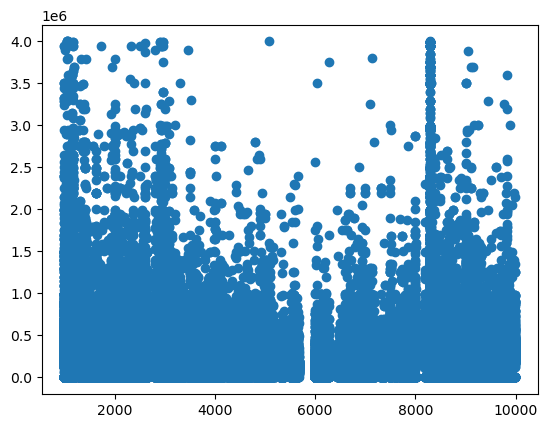

In [163]:
plt.scatter(x='PostalCode', y='Price', data=data)

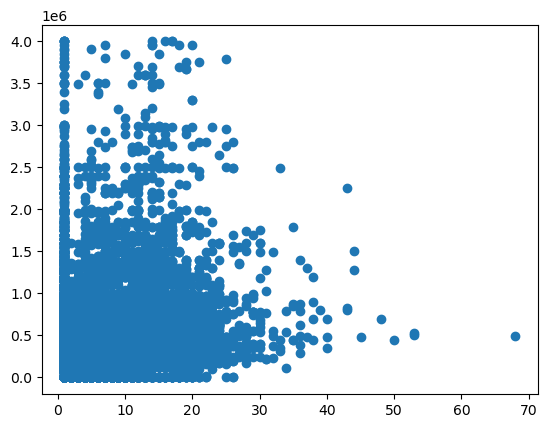

In [164]:
plt.scatter(x='RoomCount', y='Price', data=data)

In [165]:
data.query('RoomCount > 30')

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
6,https://www.immoweb.be/en/classified/house/for-sale/tournai/7500/10956841,6.0,13,1920.0,Belgium,Tournai,NaN,None,0.0,NaN,NaN,None,391.0,Tournai,NaN,3.0,D,7500,765000,10956841,Hainaut,Wallonie,31.0,NaN,GOOD,apartment_block,130.0,NaN,NaN,5.0,1,residential_sale
1054,https://www.immoweb.be/en/classified/apartment/for-sale/aywaille/4920/10943177,3.0,7,1900.0,Belgium,Liège,NaN,NON_FLOOD_ZONE,NaN,NaN,NaN,INSTALLED,354.0,Aywaille,NaN,2.0,C,4920,479000,10943177,Liège,Wallonie,45.0,NaN,GOOD,apartment,NaN,0.0,1.0,6.0,2,residential_sale
4764,https://www.immoweb.be/en/classified/house/for-sale/thon/5300/10752611,1.0,6,NaN,Belgium,Namur,NaN,None,NaN,NaN,NaN,None,372.0,Thon,NaN,2.0,E,5300,495000,10752611,Namur,Wallonie,36.0,2.0,GOOD,mixed_use_building,326.0,NaN,1.0,3.0,1,residential_sale
21664,https://www.immoweb.be/en/classified/house/for-sale/halanzy/6792/10664651,0.0,0,1978.0,Belgium,Arlon,1.0,None,0.0,NaN,NaN,None,900.0,Halanzy,NaN,3.0,C,6792,620000,10664651,Luxembourg,Wallonie,36.0,0.0,TO_RENOVATE,apartment_block,0.0,0.0,NaN,0.0,1,residential_sale
25201,https://www.immoweb.be/en/classified/house/for-sale/chimay/6460/10853264,3.0,8,NaN,Belgium,Thuin,NaN,None,NaN,1.0,90.0,None,362.0,Chimay,NaN,4.0,G,6460,220000,10853264,Hainaut,Wallonie,31.0,NaN,TO_BE_DONE_UP,house,380.0,NaN,1.0,4.0,1,residential_sale
29718,https://www.immoweb.be/en/classified/house/for-sale/malmedy/4960/10769109,3.0,7,1950.0,Belgium,Verviers,NaN,None,0.0,NaN,NaN,SEMI_EQUIPPED,369.0,Malmedy,NaN,2.0,None,4960,309000,10769109,Liège,Wallonie,33.0,1.0,TO_BE_DONE_UP,house,122.0,0.0,1.0,4.0,1,residential_sale
30076,https://www.immoweb.be/en/classified/house/for-sale/verviers/4800/10763700,5.0,6,1800.0,Belgium,Verviers,NaN,None,0.0,1.0,300.0,SEMI_EQUIPPED,495.0,Verviers,NaN,3.0,D,4800,450000,10763700,Liège,Wallonie,50.0,4.0,GOOD,apartment_block,495.0,0.0,1.0,5.0,1,residential_sale
33033,https://www.immoweb.be/en/classified/house/for-sale/corroy-le-grand/1325/11486842,9.0,10,1972.0,Belgium,Nivelles,NaN,None,0.0,1.0,3752.0,HYPER_EQUIPPED,510.0,Corroy-le-Grand,NaN,4.0,D,1325,1395000,11486842,Walloon Brabant,Wallonie,36.0,3.0,AS_NEW,villa,3985.0,NaN,1.0,10.0,1,residential_sale
35162,https://www.immoweb.be/en/classified/house/for-sale/sprimont/4140/11467136,4.0,11,NaN,Belgium,Liège,NaN,NON_FLOOD_ZONE,0.0,NaN,NaN,NOT_INSTALLED,401.0,Sprimont,NaN,4.0,G,4140,485000,11467136,Liège,Wallonie,40.0,NaN,TO_RENOVATE,house,1860.0,0.0,1.0,4.0,1,residential_sale
38542,https://www.immoweb.be/en/classified/house/for-sale/olne/4877/11463965,3.0,8,NaN,Belgium,Verviers,NaN,None,NaN,1.0,2444.0,None,653.0,Olne,NaN,3.0,C,4877,1275000,11463965,Liège,Wallonie,44.0,1.0,AS_NEW,house,2940.0,1.0,1.0,5.0,1,residential_sale


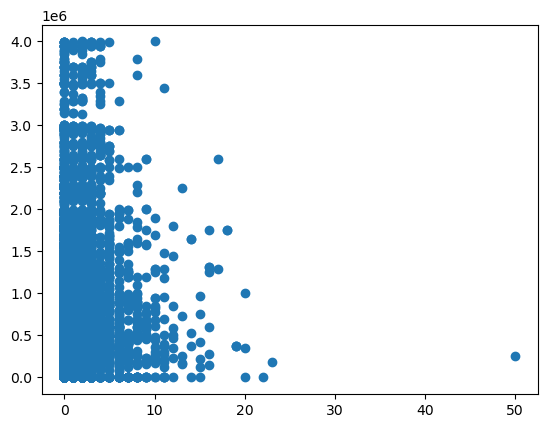

In [166]:
plt.scatter(x='ShowerCount', y='Price', data=data)

In [167]:
data.query('ShowerCount > 20')

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
45222,https://www.immoweb.be/en/classified/house/for-sale/herstal/4040/11479752,1.0,2,1936.0,Belgium,Liège,NaN,NON_FLOOD_ZONE,0.0,NaN,NaN,INSTALLED,110.0,Herstal,NaN,2.0,C,4040,179000,11479752,Liège,Wallonie,NaN,23.0,GOOD,house,75.0,0.0,1.0,1.0,1,residential_sale
46953,https://www.immoweb.be/en/classified/house/for-rent/tervuren/3080/11478080,2.0,3,NaN,Belgium,Leuven,NaN,None,NaN,1.0,800.0,HYPER_EQUIPPED,178.0,Tervuren,0.0,NaN,A,3080,1790,11478080,Flemish Brabant,Flanders,9.0,22.0,JUST_RENOVATED,bungalow,0.0,NaN,NaN,1.0,1,residential_monthly_rent
134891,https://www.immoweb.be/en/classified/house/for-sale/tournai/7500/10616605,2.0,2,NaN,Belgium,Tournai,NaN,None,0.0,NaN,NaN,INSTALLED,134.0,Tournai,NaN,3.0,B,7500,250000,10616605,Hainaut,Wallonie,NaN,50.0,AS_NEW,house,63.0,0.0,NaN,NaN,1,residential_sale


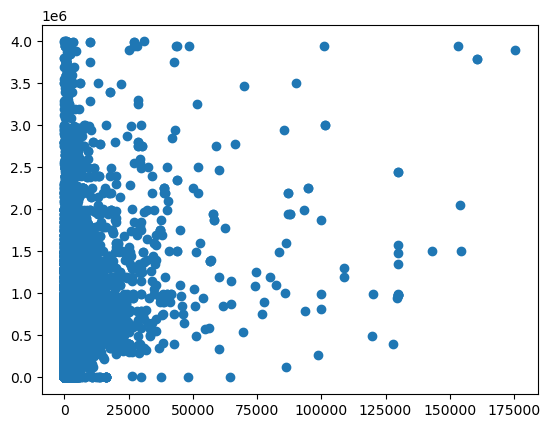

In [168]:
plt.scatter(x='SurfaceOfPlot', y='Price', data=data)

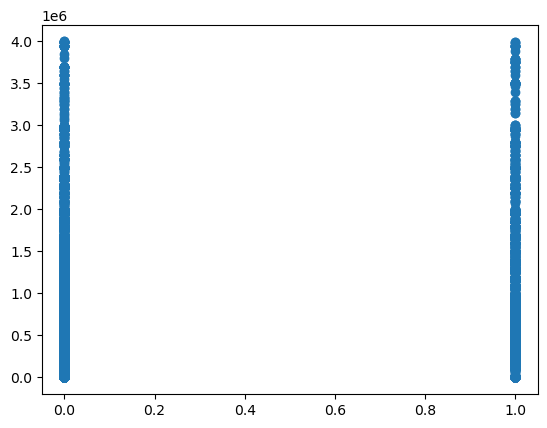

In [169]:
plt.scatter(x='SwimmingPool', y='Price', data=data)

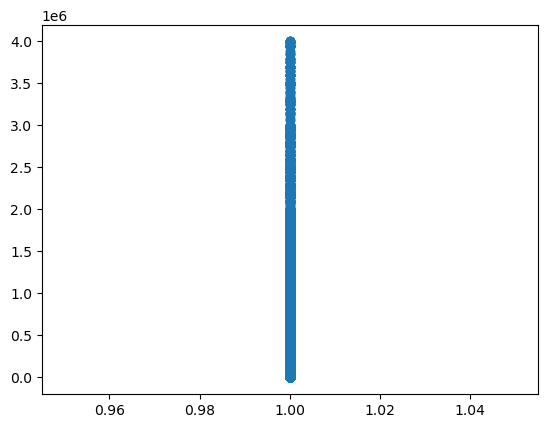

In [170]:
plt.scatter(x='Terrace', y='Price', data=data)

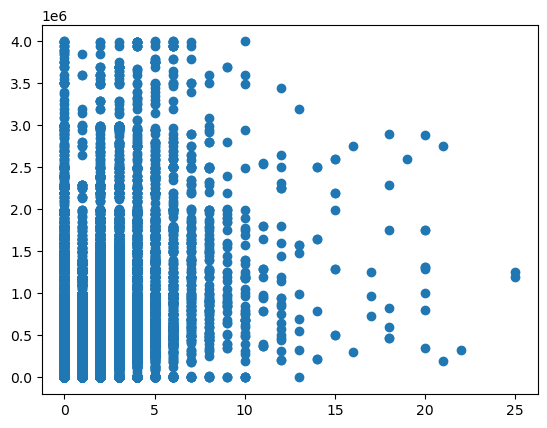

In [171]:
plt.scatter(x='ToiletCount', y='Price', data=data)

In [172]:
data.query('ToiletCount > 15')

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
1271,https://www.immoweb.be/en/classified/house/for-sale/bastogne/6600/10940526,18.0,19,1874.0,Belgium,Bastogne,NaN,NON_FLOOD_ZONE,1.0,1.0,28870.0,HYPER_EQUIPPED,1560.0,Bastogne,NaN,4.0,D,6600,1750000,10940526,Luxembourg,Wallonie,NaN,18.0,GOOD,castle,28870.0,0.0,1.0,20.0,1,residential_sale
1273,https://www.immoweb.be/en/classified/house/for-sale/fauvillers/6637/10940525,18.0,19,1874.0,Belgium,Bastogne,NaN,NON_FLOOD_ZONE,1.0,1.0,28870.0,HYPER_EQUIPPED,1560.0,Fauvillers,NaN,4.0,D,6637,1750000,10940525,Luxembourg,Wallonie,NaN,18.0,GOOD,house,28870.0,0.0,1.0,20.0,1,residential_sale
25510,https://www.immoweb.be/en/classified/apartment/for-sale/enghien/7850/10849017,11.0,3,NaN,Belgium,Soignies,NaN,NON_FLOOD_ZONE,NaN,1.0,150.0,None,1200.0,Enghien,NaN,2.0,C,7850,2750000,10849017,Hainaut,Wallonie,NaN,5.0,None,apartment,NaN,NaN,1.0,16.0,2,residential_sale
26735,https://www.immoweb.be/en/classified/house/for-sale/bruxelles/1000/10823525,15.0,15,NaN,Belgium,Brussels,NaN,None,0.0,NaN,NaN,None,882.0,Bruxelles,NaN,3.0,D,1000,1750000,10823525,Brussels,Brussels,NaN,16.0,GOOD,mixed_use_building,172.0,NaN,1.0,18.0,1,residential_sale
30225,https://www.immoweb.be/en/classified/house/for-sale/schaerbeek/1030/11491118,NaN,15,NaN,Belgium,Brussels,NaN,None,NaN,NaN,NaN,None,450.0,Schaerbeek,NaN,2.0,D,1030,975000,11491118,Brussels,Brussels,NaN,15.0,JUST_RENOVATED,house,0.0,0.0,1.0,17.0,1,residential_sale
72639,https://www.immoweb.be/en/classified/house/for-sale/sy/4190/11391055,0.0,15,1875.0,Belgium,Huy,1.0,None,1.0,1.0,1287.0,INSTALLED,968.0,SY,NaN,4.0,None,4190,1319000,11391055,Liège,Wallonie,NaN,16.0,GOOD,house,1287.0,1.0,1.0,20.0,1,residential_sale
72641,https://www.immoweb.be/en/classified/house/for-sale/durbuy/6940/11391054,0.0,15,1875.0,Belgium,Marche-en-Famenne,1.0,None,1.0,1.0,1287.0,INSTALLED,968.0,DURBUY,NaN,4.0,None,6940,1319000,11391054,Luxembourg,Wallonie,NaN,16.0,GOOD,house,1287.0,1.0,1.0,20.0,1,residential_sale
77037,https://www.immoweb.be/en/classified/house/for-sale/antwerpen/2060/11378341,18.0,0,1969.0,Belgium,Antwerp,NaN,NON_FLOOD_ZONE,1.0,NaN,NaN,INSTALLED,445.0,ANTWERPEN,NaN,2.0,B,2060,2895000,11378341,Antwerp,Flanders,NaN,0.0,AS_NEW,apartment_block,205.0,NaN,1.0,18.0,1,residential_sale
81132,https://www.immoweb.be/en/classified/house/for-sale/mechelen/2800/11424400,20.0,20,1976.0,Belgium,Mechelen,NaN,POSSIBLE_FLOOD_ZONE,NaN,NaN,NaN,HYPER_EQUIPPED,1820.0,Mechelen,NaN,NaN,None,2800,2750000,11424400,Antwerp,Flanders,20.0,NaN,None,mixed_use_building,58835.0,NaN,NaN,21.0,1,residential_sale
91267,https://www.immoweb.be/en/classified/house/for-sale/bastogne/6600/11446613,9.0,9,1950.0,Belgium,Bastogne,NaN,NON_FLOOD_ZONE,1.0,1.0,9200.0,INSTALLED,485.0,Bastogne,NaN,4.0,None,6600,475000,11446613,Luxembourg,Wallonie,NaN,9.0,TO_RENOVATE,mixed_use_building,2960.0,0.0,1.0,18.0,1,residential_sale


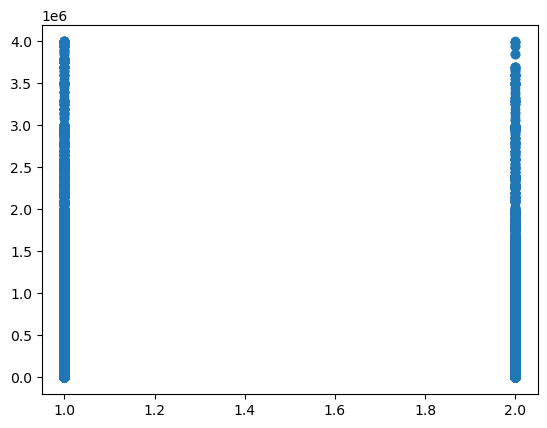

In [173]:
plt.scatter(x='TypeOfProperty', y='Price', data=data)

In [174]:
pd.DataFrame(data.isnull().sum().sort_values(ascending=False)).head(20)

,0
Fireplace,114316
MonthlyCharges,104751
GardenArea,95973
Garden,95973
Furnished,88196
RoomCount,85580
SwimmingPool,78217
ShowerCount,61454
SurfaceOfPlot,60413
FloodingZone,60236


In [175]:
data['TypeOfSale'].unique()

array(['residential_sale', 'residential_monthly_rent',
       'annuity_without_lump_sum', 'annuity_monthly_amount',
       'annuity_lump_sum'], dtype=object)

In [176]:
data.drop(data[data.TypeOfSale == "annuity_monthly_amount"].index,inplace=True)
data.drop(data[data.TypeOfSale == "annuity_without_lump_sum"].index,inplace=True)
data.drop(data[data.TypeOfSale == "annuity_lump_sum"].index,inplace=True)
data.drop(data[data.TypeOfSale == "homes_to_build"].index,inplace=True)

In [177]:
data_sales = data[data.TypeOfSale == "residential_sale"]
data_rent = data[data.TypeOfSale == "residential_monthly_rent"]

In [178]:
pd.DataFrame(data_sales.isnull().sum().sort_values(ascending=False)).head(30)

,0
MonthlyCharges,104638
Fireplace,101005
GardenArea,84199
Garden,84199
RoomCount,75641
Furnished,74494
SwimmingPool,71555
ShowerCount,55263
FloodingZone,51381
SurfaceOfPlot,49630


In [179]:
pd.DataFrame(data_rent.isnull().sum().sort_values(ascending=False)).head(20)

,0
Furnished,13447
Fireplace,13039
GardenArea,11530
Garden,11530
SurfaceOfPlot,10667
RoomCount,9649
FloodingZone,8670
ConstructionYear,7845
SwimmingPool,6411
ShowerCount,6121


## Data sales

In [180]:
data_sales.shape

(104638, 32)

In [181]:
pd.DataFrame(data_sales.isnull().sum().sort_values(ascending=False)).head(20)

,0
MonthlyCharges,104638
Fireplace,101005
GardenArea,84199
Garden,84199
RoomCount,75641
Furnished,74494
SwimmingPool,71555
ShowerCount,55263
FloodingZone,51381
SurfaceOfPlot,49630


In [182]:
data_sales['MonthlyCharges'].unique()

array([nan])

In [183]:
data_sales.drop(['MonthlyCharges'], axis=1, inplace=True)

/tmp/ipykernel_10096/3118624834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales.drop(['MonthlyCharges'], axis=1, inplace=True)


In [184]:
data_sales['Fireplace'].unique()

array([nan,  1.])

In [185]:
data_sales['Fireplace'].fillna(0, inplace=True)

/tmp/ipykernel_10096/3880146483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['Fireplace'].fillna(0, inplace=True)


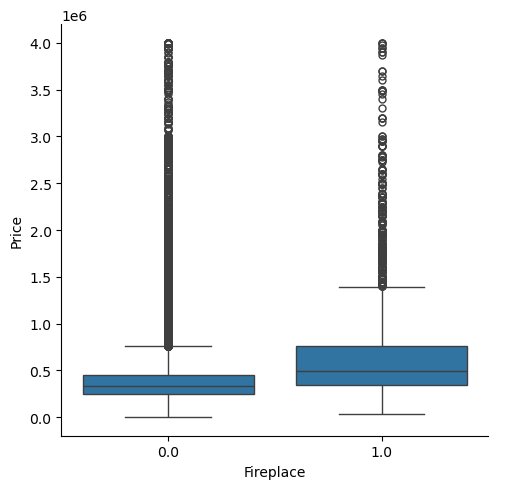

In [186]:
sns.catplot(data=data_sales, x="Fireplace", y="Price", kind="box")

In [187]:
data_sales['Garden'].unique()

array([nan,  1.])

In [188]:
data_sales['Garden'].fillna(0, inplace=True)

/tmp/ipykernel_10096/937975057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['Garden'].fillna(0, inplace=True)


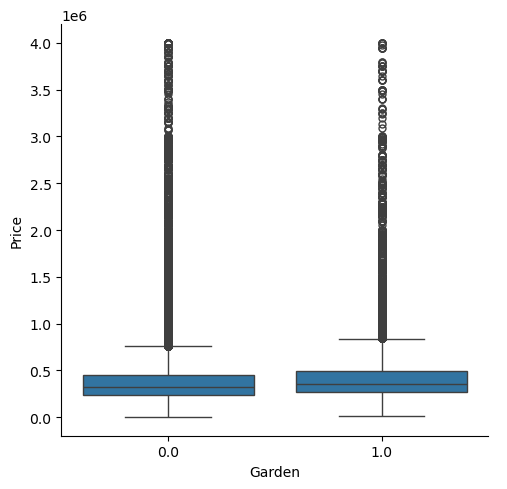

In [189]:
sns.catplot(data=data_sales, x="Garden", y="Price", kind="box")

In [190]:
data_sales['GardenArea'].unique()

array([      nan, 1.000e+00, 7.600e+01, ..., 8.830e+02, 3.705e+03,
       4.179e+03])

In [191]:
data_sales['GardenArea'].fillna(0, inplace=True)

/tmp/ipykernel_10096/1579274237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['GardenArea'].fillna(0, inplace=True)


In [192]:
data_sales['RoomCount'].unique()

array([ 1., 31., nan, 16., 14.,  4.,  9., 12., 17.,  8.,  7.,  6.,  3.,
       13., 10.,  5.,  2., 19., 20., 11., 18., 23., 45., 15., 24., 22.,
       27., 28., 26., 29., 36., 21., 25., 30., 33., 50., 40., 44., 32.,
       43., 38., 37., 53., 35., 34., 48., 39., 68.])

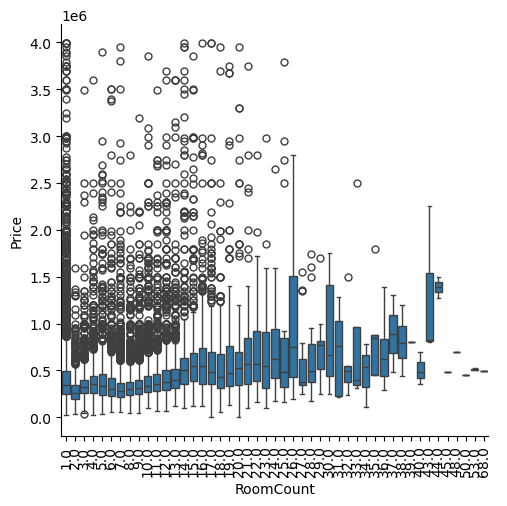

In [193]:
sns.catplot(data=data_sales, x="RoomCount", y="Price", kind="box")
plt.xticks(rotation=90)
plt.show()

In [194]:
data_sales['Furnished'].unique()

array([nan,  0.,  1.])

In [195]:
data_sales['Furnished'].fillna(0, inplace=True)

/tmp/ipykernel_10096/2060602967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['Furnished'].fillna(0, inplace=True)


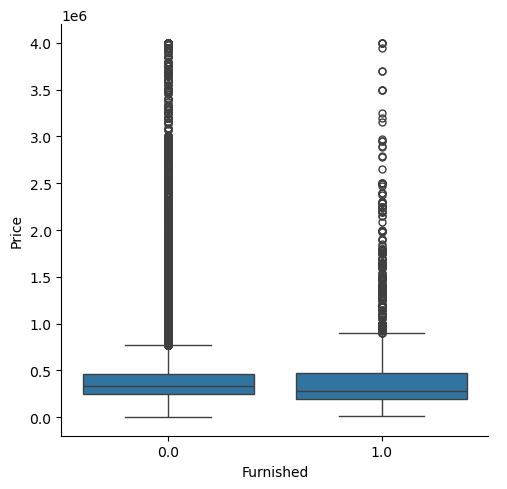

In [196]:
sns.catplot(data=data_sales, x="Furnished", y="Price", kind="box")

In [197]:
data_sales['SwimmingPool'].unique()

array([nan,  0.,  1.])

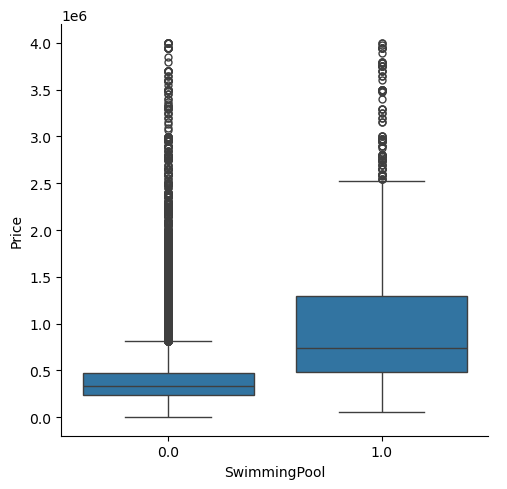

In [198]:
sns.catplot(data=data_sales, x="SwimmingPool", y="Price", kind="box")

In [199]:
data_sales['SwimmingPool'].fillna(0, inplace=True)

/tmp/ipykernel_10096/796884055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['SwimmingPool'].fillna(0, inplace=True)


In [200]:
data_sales['ShowerCount'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5., 18.,  6.,  7.,  9., 11., 10.,
       12., 15.,  8., 16., 23., 14., 17., 13., 20., 19., 50.])

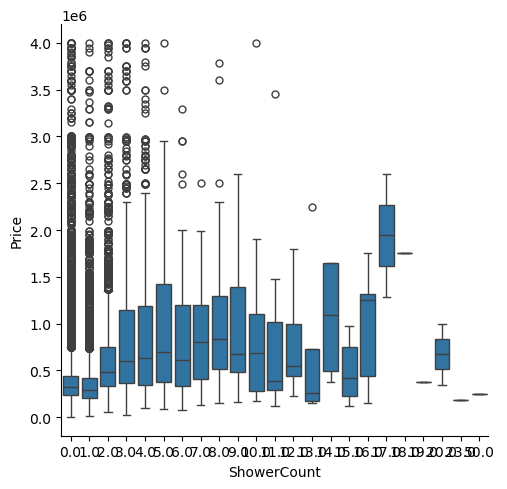

In [201]:
sns.catplot(data=data_sales, x="ShowerCount", y="Price", kind="box")

In [202]:
data_sales['ShowerCount'].fillna(0, inplace=True)

/tmp/ipykernel_10096/3945978582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['ShowerCount'].fillna(0, inplace=True)


In [203]:
data_sales['FloodingZone'].unique()

array([None, 'NON_FLOOD_ZONE', 'POSSIBLE_FLOOD_ZONE',
       'RECOGNIZED_FLOOD_ZONE', 'CIRCUMSCRIBED_WATERSIDE_ZONE',
       'POSSIBLE_N_CIRCUMSCRIBED_FLOOD_ZONE',
       'RECOGNIZED_N_CIRCUMSCRIBED_WATERSIDE_FLOOD_ZONE',
       'CIRCUMSCRIBED_FLOOD_ZONE',
       'RECOGNIZED_N_CIRCUMSCRIBED_FLOOD_ZONE',
       'POSSIBLE_N_CIRCUMSCRIBED_WATERSIDE_ZONE'], dtype=object)

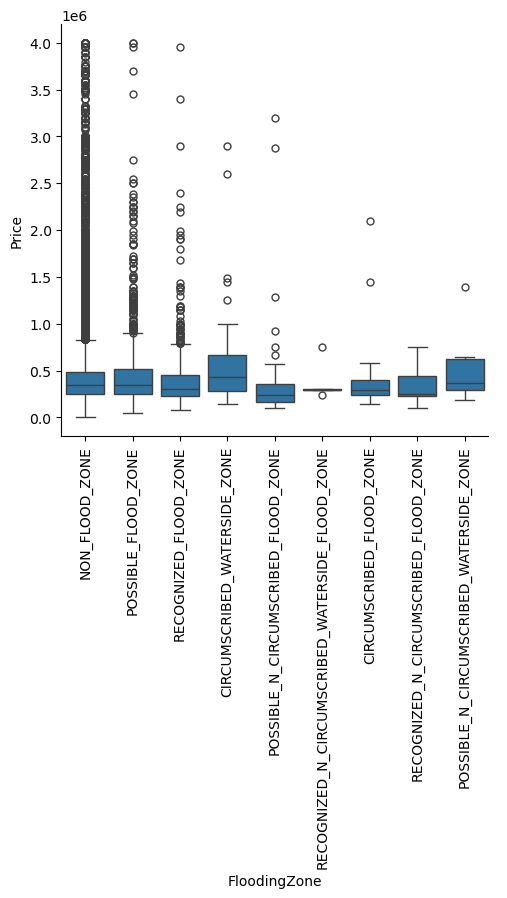

In [204]:
sns.catplot(data=data_sales, x="FloodingZone", y="Price", kind="box")
plt.xticks(rotation=90)
plt.show()

In [205]:
data_sales.groupby('FloodingZone')['FloodingZone'].agg('count')

FloodingZone
CIRCUMSCRIBED_FLOOD_ZONE                              32
CIRCUMSCRIBED_WATERSIDE_ZONE                          48
NON_FLOOD_ZONE                                     51042
POSSIBLE_FLOOD_ZONE                                 1460
POSSIBLE_N_CIRCUMSCRIBED_FLOOD_ZONE                   47
POSSIBLE_N_CIRCUMSCRIBED_WATERSIDE_ZONE                9
RECOGNIZED_FLOOD_ZONE                                593
RECOGNIZED_N_CIRCUMSCRIBED_FLOOD_ZONE                 21
RECOGNIZED_N_CIRCUMSCRIBED_WATERSIDE_FLOOD_ZONE        5
Name: FloodingZone, dtype: int64

In [206]:
data_sales['FloodingZone'].fillna('NON_FLOOD_ZONE', inplace=True)

/tmp/ipykernel_10096/2404400355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['FloodingZone'].fillna('NON_FLOOD_ZONE', inplace=True)


In [207]:
data_sales['SurfaceOfPlot'].unique()

array([   nan,   130.,     0., ...,  5792.,  6710., 10703.])

In [208]:
data_sales['SurfaceOfPlot'].fillna(0, inplace=True)

/tmp/ipykernel_10096/1081570387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['SurfaceOfPlot'].fillna(0, inplace=True)


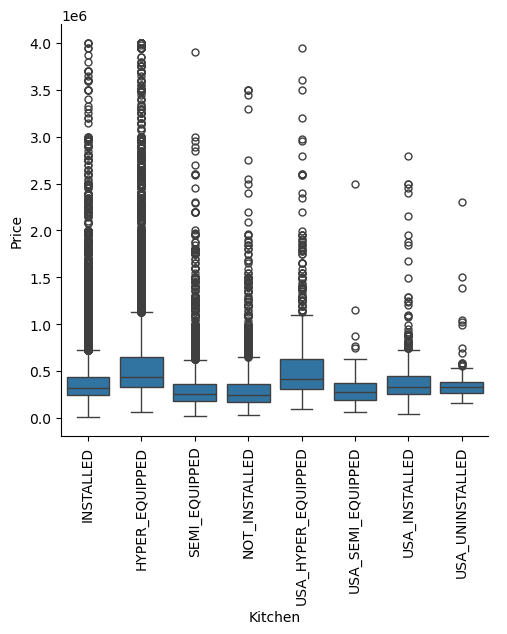

In [209]:
sns.catplot(data=data_sales, x="Kitchen", y="Price", kind="box")
plt.xticks(rotation=90)
plt.show()

In [210]:
data_sales.groupby('Kitchen')['Kitchen'].agg('count')

Kitchen
HYPER_EQUIPPED        16579
INSTALLED             28264
NOT_INSTALLED          3743
SEMI_EQUIPPED          7040
USA_HYPER_EQUIPPED      972
USA_INSTALLED           861
USA_SEMI_EQUIPPED       119
USA_UNINSTALLED          79
Name: Kitchen, dtype: int64

In [211]:
data_sales['Kitchen'].fillna('NOT_INSTALLED', inplace=True)

/tmp/ipykernel_10096/3107304889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['Kitchen'].fillna('NOT_INSTALLED', inplace=True)


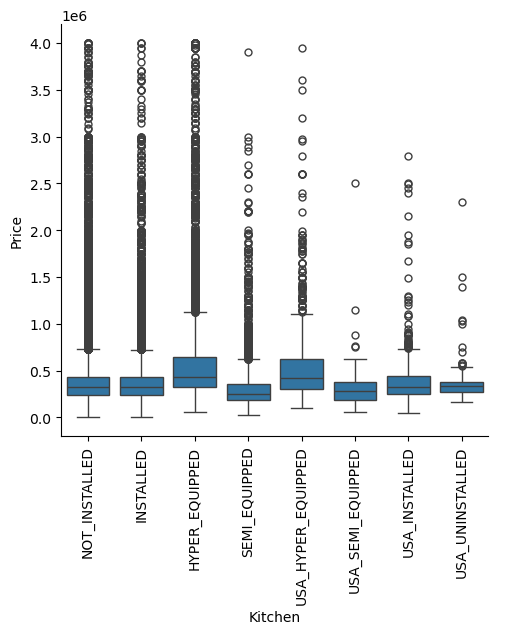

In [212]:
sns.catplot(data=data_sales, x="Kitchen", y="Price", kind="box")
plt.xticks(rotation=90)
plt.show()

In [213]:
data_sales['Terrace'].unique()

array([ 1., nan])

In [214]:
data_sales['Terrace'].fillna(0, inplace=True)

/tmp/ipykernel_10096/1706662363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['Terrace'].fillna(0, inplace=True)


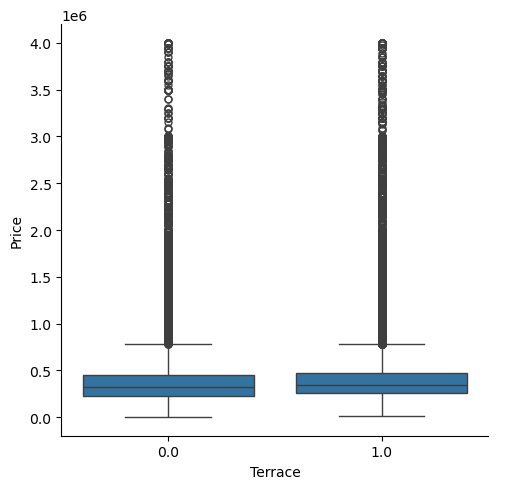

In [215]:
sns.catplot(data=data_sales, x="Terrace", y="Price", kind="box")

In [216]:
data_sales['ConstructionYear'].unique()

array([1969., 1920., 2008.,   nan, 1972., 1994., 2023., 1961., 1987.,
       1966., 1923., 1974., 1860., 1950., 2015., 1968., 1965., 1935.,
       2024., 2022., 1918., 2010., 1930., 1932., 1990., 1939., 1997.,
       1993., 1952., 1962., 2020., 1963., 1992., 1946., 2006., 2019.,
       1971., 1970., 1976., 1936., 2025., 1984., 1958., 2017., 2001.,
       1977., 1996., 1900., 1988., 1790., 1931., 1951., 2016., 1947.,
       2009., 1985., 1957., 2007., 1911., 1928., 1978., 1954., 1967.,
       2004., 1915., 1973., 2021., 2005., 1850., 1979., 1986., 2012.,
       1981., 1964., 1919., 2000., 2018., 1960., 1953., 1955., 1980.,
       1910., 1937., 2014., 1999., 1874., 2011., 1899., 1949., 1934.,
       1871., 2013., 1940., 1989., 1875., 1948., 1890., 1905., 1956.,
       1983., 1925., 1938., 1982., 1912., 1975., 1991., 2003., 1959.,
       1896., 1995., 1893., 1830., 1927., 1998., 1941., 2002., 1933.,
       1873., 1901., 1909., 1942., 1870., 1758., 2026., 1902., 1776.,
       1800., 1913.,

In [217]:
data_sales['NumberOfFacades'].unique()

array([nan,  3.,  2.,  4.,  1.,  5.,  6.,  7.,  8.])

In [218]:
# data_sales['NumberOfFacades'].fillna(2, inplace=True)

In [219]:
data_sales['StateOfBuilding'].unique()

array(['GOOD', 'TO_BE_DONE_UP', 'AS_NEW', None, 'TO_RENOVATE',
       'TO_RESTORE', 'JUST_RENOVATED'], dtype=object)

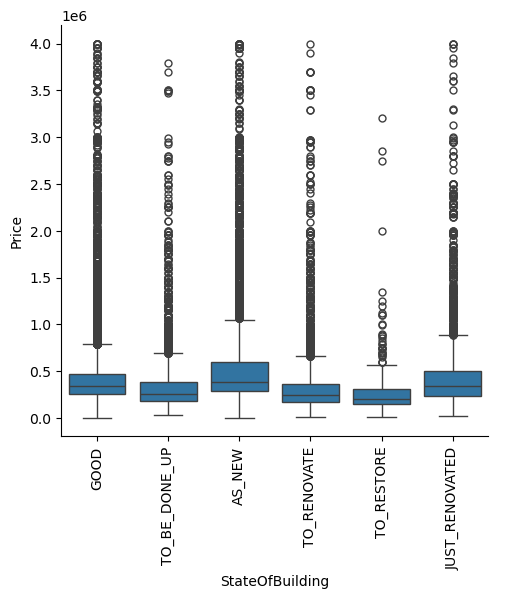

In [220]:
sns.catplot(data=data_sales, x="StateOfBuilding", y="Price", kind="box")
plt.xticks(rotation=90)
plt.show()

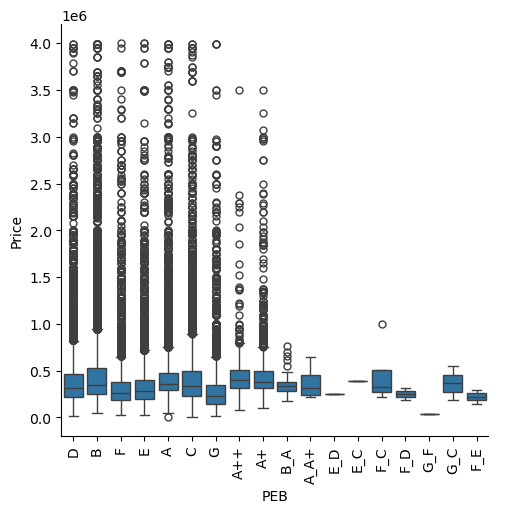

In [221]:
sns.catplot(data=data_sales, x="PEB", y="Price", kind="box")
plt.xticks(rotation=90)
plt.show()

In [222]:
data_sales['ToiletCount'].unique()

array([ 1.,  5.,  2.,  0., nan,  3.,  4.,  6., 20., 11., 10.,  8.,  7.,
        9., 14., 13., 12., 15., 16., 18., 17., 21., 22., 25., 19.])

In [223]:
data_sales['ToiletCount'].fillna(0, inplace=True)

/tmp/ipykernel_10096/2211876506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['ToiletCount'].fillna(0, inplace=True)


In [224]:
data_sales['LivingArea'].unique()

array([  29.,  391.,  111., ...,  843.,  929., 1190.])

In [225]:
data_sales['BathroomCount'].unique()

array([  1.,   6.,   2.,   0.,  nan,   3.,   9.,   4.,   5.,   8.,  18.,
        11.,   7.,  22., 130.,  10.,  12.,  15.,  16.,  17.,  14., 145.,
        13.,  20.,  23.,  19.,  24.])

In [226]:
data_sales['BathroomCount'].fillna(0, inplace=True)

/tmp/ipykernel_10096/307760922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['BathroomCount'].fillna(0, inplace=True)


In [227]:
data_sales['District'].unique()

array(['Brugge', 'Tournai', 'Veurne', 'Hasselt', 'Brussels', 'Mechelen',
       'Halle-Vilvoorde', 'Sint-Niklaas', 'Oostend', 'Antwerp', 'Ieper',
       'Mons', 'Namur', 'Philippeville', 'Soignies', 'Leuven', 'Nivelles',
       'Charleroi', 'Liège', 'Maaseik', 'Verviers', 'Aalst', 'Tongeren',
       'Marche-en-Famenne', 'Kortrijk', 'Gent', 'Eeklo', 'Diksmuide',
       'Dendermonde', 'Waremme', 'Huy', 'Dinant', 'Neufchâteau',
       'Mouscron', 'Tielt', 'Roeselare', 'Turnhout', 'Oudenaarde',
       'Thuin', 'Arlon', 'Virton', 'Ath', 'Bastogne'], dtype=object)

In [228]:
data_sales['Province'].unique()

array(['West Flanders', 'Hainaut', 'Limburg', 'Brussels', 'Antwerp',
       'Flemish Brabant', 'East Flanders', 'Namur', 'Walloon Brabant',
       'Liège', 'Luxembourg'], dtype=object)

In [229]:
data_sales['Locality'].unique()

array(['Zeebrugge', 'Tournai', 'BLANKENBERGE', ..., 'LA GLEIZE',
       'Ham-sur-Heure-Nalinnes ', 'Brasmenil'], dtype=object)

In [230]:
data_sales.shape

(104638, 31)

In [231]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104638 entries, 2 to 181791
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Url                104638 non-null  object 
 1   BathroomCount      104638 non-null  float64
 2   BedroomCount       104638 non-null  int64  
 3   ConstructionYear   62849 non-null   float64
 4   Country            104638 non-null  object 
 5   District           104638 non-null  object 
 6   Fireplace          104638 non-null  float64
 7   FloodingZone       104638 non-null  object 
 8   Furnished          104638 non-null  float64
 9   Garden             104638 non-null  float64
 10  GardenArea         104638 non-null  float64
 11  Kitchen            104638 non-null  object 
 12  LivingArea         93350 non-null   float64
 13  Locality           104638 non-null  object 
 14  NumberOfFacades    67861 non-null   float64
 15  PEB                74169 non-null   object 
 16  Po

In [232]:
data_sales.dtypes[data_sales.dtypes == 'float64']

BathroomCount       float64
ConstructionYear    float64
Fireplace           float64
Furnished           float64
Garden              float64
GardenArea          float64
LivingArea          float64
NumberOfFacades     float64
RoomCount           float64
ShowerCount         float64
SurfaceOfPlot       float64
SwimmingPool        float64
Terrace             float64
ToiletCount         float64
dtype: object

In [233]:
# data_sales['RoomCount'].fillna(0, inplace=True)
# data_sales['ConstructionYear'].fillna(data_sales['ConstructionYear'].median(), inplace=True)
data_sales['StateOfBuilding'].fillna('Unknown', inplace=True)
data_sales['PEB'].fillna('Unknown', inplace=True)
# data_sales['LivingArea'].fillna(data_sales['LivingArea'].median(), inplace=True)

/tmp/ipykernel_10096/3119383845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['StateOfBuilding'].fillna('Unknown', inplace=True)
/tmp/ipykernel_10096/3119383845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['PEB'].fillna('Unknown', inplace=True)


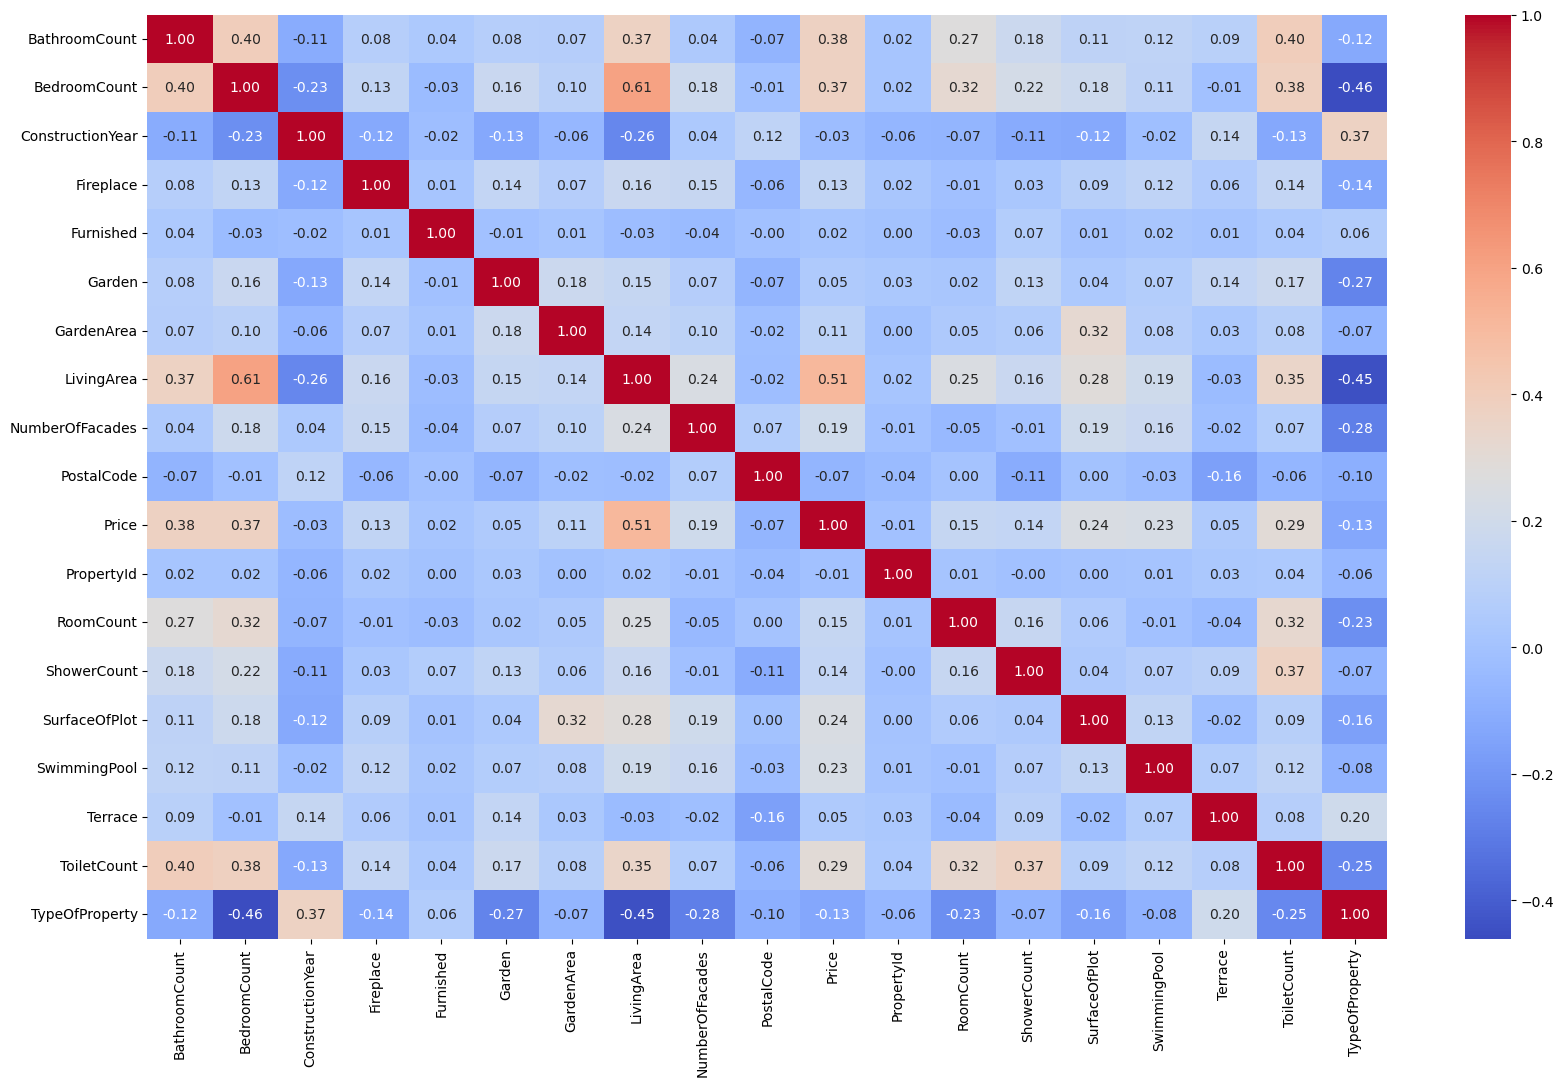

In [234]:
correlation_matrix = data_sales.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [235]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104638 entries, 2 to 181791
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Url                104638 non-null  object 
 1   BathroomCount      104638 non-null  float64
 2   BedroomCount       104638 non-null  int64  
 3   ConstructionYear   62849 non-null   float64
 4   Country            104638 non-null  object 
 5   District           104638 non-null  object 
 6   Fireplace          104638 non-null  float64
 7   FloodingZone       104638 non-null  object 
 8   Furnished          104638 non-null  float64
 9   Garden             104638 non-null  float64
 10  GardenArea         104638 non-null  float64
 11  Kitchen            104638 non-null  object 
 12  LivingArea         93350 non-null   float64
 13  Locality           104638 non-null  object 
 14  NumberOfFacades    67861 non-null   float64
 15  PEB                104638 non-null  object 
 16  Po

In [236]:
pd.DataFrame(data_sales.isnull().sum().sort_values(ascending=False)).head(20)

,0
RoomCount,75641
ConstructionYear,41789
NumberOfFacades,36777
LivingArea,11288
Url,0
StateOfBuilding,0
Province,0
Region,0
ShowerCount,0
SubtypeOfProperty,0


<Axes: xlabel='Price', ylabel='Count'>

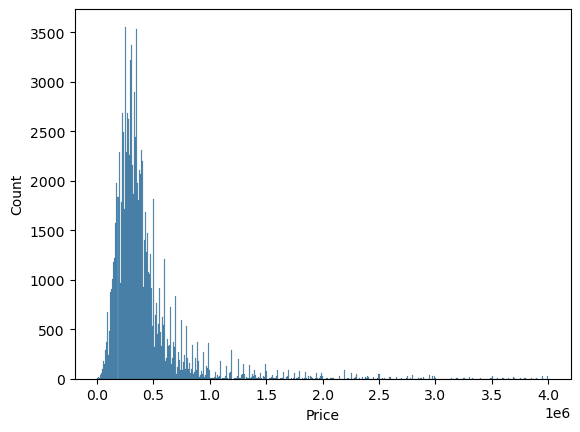

In [237]:
sns.histplot(
    data_sales,
    x=data_sales['Price']
)

In [238]:
# data_sales['Price'] = np.log1p(data_sales['Price'])

In [239]:
data_sales.groupby('PEB')['PEB'].agg('count')

PEB
A          13313
A+          1785
A++          580
A_A+           4
B          14927
B_A           61
C          12521
D          10224
E           6971
E_C            1
E_D            1
F           9128
F_C            4
F_D            2
F_E            2
G           4642
G_C            2
G_F            1
Unknown    30469
Name: PEB, dtype: int64

In [240]:
keep_PEB = ['A++', 'A+', 'B', 'C', 'D', 'E', 'F', 'G']
data_sales = data_sales[data_sales['PEB'].isin(keep_PEB)]

In [241]:
# order of the PEB
peb_order = ['A++', 'A+', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']
ordinal_encoder = OrdinalEncoder(categories=[peb_order])
data_sales.loc[:, 'PEB_Encoded'] = ordinal_encoder.fit_transform(data_sales[['PEB']])

/tmp/ipykernel_10096/3321528858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales.loc[:, 'PEB_Encoded'] = ordinal_encoder.fit_transform(data_sales[['PEB']])


In [242]:
state_order = ['AS_NEW', 'JUST_RENOVATED', 'GOOD', 'TO_BE_DONE_UP', 'TO_RENOVATE', 'TO_RESTORE', 'Unknown']
ordinal_encoder = OrdinalEncoder(categories=[state_order])
data_sales.loc[:, 'State_Encoded'] = ordinal_encoder.fit_transform(data_sales[['StateOfBuilding']])


/tmp/ipykernel_10096/3378945398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales.loc[:, 'State_Encoded'] = ordinal_encoder.fit_transform(data_sales[['StateOfBuilding']])


In [ ]:
state_order = ['AS_NEW', 'JUST_RENOVATED', 'GOOD', 'TO_BE_DONE_UP', 'TO_RENOVATE', 'TO_RESTORE', 'Unknown']
ordinal_encoder = OrdinalEncoder(categories=[state_order])
data_sales.loc[:, 'State_Encoded'] = ordinal_encoder.fit_transform(data_sales[['StateOfBuilding']])

In [243]:
data_sales.groupby('PEB')['PEB'].agg('count')

PEB
A+      1785
A++      580
B      14927
C      12521
D      10224
E       6971
F       9128
G       4642
Name: PEB, dtype: int64

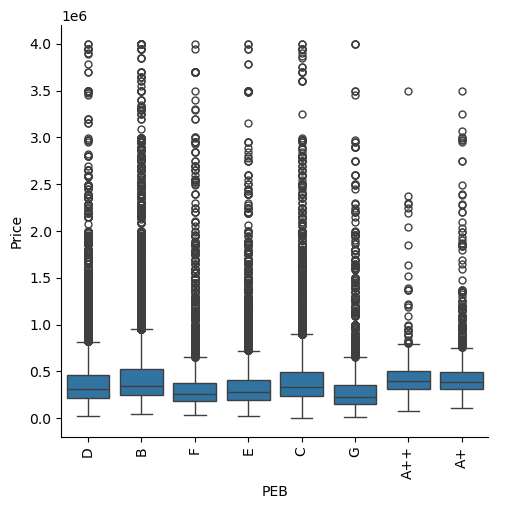

In [244]:
sns.catplot(data=data_sales, x="PEB", y="Price", kind="box")
plt.xticks(rotation=90)
plt.show()

In [245]:
data_sales.dtypes[data_sales.dtypes == 'object']

Url                  object
Country              object
District             object
FloodingZone         object
Kitchen              object
Locality             object
PEB                  object
Province             object
Region               object
StateOfBuilding      object
SubtypeOfProperty    object
TypeOfSale           object
dtype: object

In [246]:
data_sales.dtypes[data_sales.dtypes != 'object']

BathroomCount       float64
BedroomCount          int64
ConstructionYear    float64
Fireplace           float64
Furnished           float64
Garden              float64
GardenArea          float64
LivingArea          float64
NumberOfFacades     float64
PostalCode            int64
Price                 int64
PropertyId            int64
RoomCount           float64
ShowerCount         float64
SurfaceOfPlot       float64
SwimmingPool        float64
Terrace             float64
ToiletCount         float64
TypeOfProperty        int64
PEB_Encoded         float64
State_Encoded       float64
dtype: object

In [247]:
data_sales = data_sales.drop(columns=['Url', 'Country', 'Locality', 'TypeOfSale', 'Fireplace', 'Furnished', 'GardenArea', 'PropertyId', 'RoomCount', 'ShowerCount', 'Terrace', 'TypeOfProperty', 'PostalCode', 'PEB', 'StateOfBuilding', 'ConstructionYear'])

In [248]:
data_sales.dtypes[data_sales.dtypes == 'object']

District             object
FloodingZone         object
Kitchen              object
Province             object
Region               object
SubtypeOfProperty    object
dtype: object

In [249]:
data_sales.dtypes[data_sales.dtypes != 'object']

BathroomCount      float64
BedroomCount         int64
Garden             float64
LivingArea         float64
NumberOfFacades    float64
Price                int64
SurfaceOfPlot      float64
SwimmingPool       float64
ToiletCount        float64
PEB_Encoded        float64
State_Encoded      float64
dtype: object

In [250]:
ode_cols = ['BathroomCount', 'BedroomCount', 'LivingArea', 'SurfaceOfPlot', 'ToiletCount', 'PEB_Encoded', 'State_Encoded']
ohe_cols = ['District', 'FloodingZone', 'Kitchen', 'Province', 'Region', 'SubtypeOfProperty']
num_cols = [ 'Garden', 'NumberOfFacades', 'SwimmingPool']

In [251]:
num_pipeline = Pipeline(steps=[
    ('impute', KNNImputer()),
    ('scaler', StandardScaler())
])


In [252]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())  # Ajout de la mise à l'échelle pour les données ordinales encodées
])

In [253]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [254]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols)
], remainder='passthrough', n_jobs=-1)

In [255]:
# Preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [256]:
X = data_sales.drop('Price', axis=1)
y = data_sales['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [260]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

In [261]:
# Utilisation de GridSearchCV pour optimiser les hyperparamètres de KNNImputer
param_grid = {
    'preprocessing__num_p__impute__n_neighbors': [3, 5, 7]
}
# [3, 5, 7, 9, 11]
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1) # reduce cv 5 to 3
grid_search.fit(X_train, y_train)

/home/broma/miniforge3/envs/ml_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/broma/miniforge3/envs/ml_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/broma/miniforge3/envs/ml_env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/broma/miniforge3/envs/ml_env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 370, in _score
    response_method = _check_response_method(estimator, self._response_method)
  File "/home/broma/miniforge3/envs/ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py", line 2145, in _check_response_me

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('num_p',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Garden',
                                                                          'NumberOfFacades',
                                                                          'SwimmingPool']),
                                                                        ('ode_p',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaler',
                                                                                          StandardScale...
                                                                          'State_Encoded']),
                                                                        ('ohe_p',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['District',
                                                                          'FloodingZone',
                                                                          'Kitchen',
                                                                          'Province',
                                                                          'Region',
                                                                          'SubtypeOfProperty'])]))]),
             n_jobs=-1,
             param_grid={'preprocessing__num_p__impute__n_neighbors': [3, 5,
                                                                       7]},
             scoring='neg_mean_absolute_error')

In [262]:
best_k = grid_search.best_params_['preprocessing__num_p__impute__n_neighbors']
print("Best k for KNNImputer:", best_k)

Best k for KNNImputer: 3


In [263]:
# Entraîner et évaluer le modèle de régression linéaire avec le meilleur k
pipeline.set_params(preprocessing__num_p__impute__n_neighbors=best_k)
X_preprocessed = pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [264]:
# Entraîner et évaluer le modèle de régression linéaire avec le meilleur k
pipeline.set_params(preprocessing__num_p__impute__n_neighbors=best_k)
pipeline.fit(X_train, y_train)
y_pred_lr = pipeline.predict(X_test)


mae = mean_absolute_error(y_test, y_pred_lr)

print("Train Score: ", train_score)
print("Test Score: ", test_score)
print("Mean Absolute Error: ", mae)

ValueError: Specifying the columns using strings is only supported for dataframes.

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_lr)

In [ ]:
train_score = pipeline.score(X_train, y_train)

In [ ]:
test_score = pipeline.score(X_test, y_test)

In [ ]:
# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error: ", mae)

In [ ]:
#############################################33

In [ ]:
RFR = RandomForestRegressor(random_state=13)

In [ ]:
param_distributions = {
    'model__max_depth': [5, 10, 15],
    'model__n_estimators': [100, 250, 500],
    'model__min_samples_split': [3, 5, 10]
}

In [ ]:
rfr_cv = GridSearchCV(RFR, RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
rfr_cv.fit(X_train, y_train)

In [ ]:
np.sqrt(-1 * rfr_cv.best_score_)

In [ ]:
rfr_cv.best_params_

In [ ]:
np.sqrt(-1 * xgb_cv.best_score_)

In [ ]:
######################

In [ ]:
XGB = XGBRegressor(random_state=13)

In [ ]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [ ]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
xgb_cv.fit(X_train, y_train)

In [ ]:
np.sqrt(-1 * xgb_cv.best_score_)

In [ ]:
xgb_cv.score(X_train, y_train)

In [ ]:
xgb_cv.score(X_test, y_test)

In [ ]:
y_pred_xgb = xgb_cv.predict(X_test)
# Calculer l'erreur absolue moyenne
mae = mean_absolute_error(y_test, y_pred_xgb)
print("Mean Absolute Error: ", mae)

In [ ]:
#################################

In [ ]:
ridge = Ridge()

In [ ]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [ ]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
ridge_cv.fit(X_train, y_train)

In [ ]:
np.sqrt(-1 * ridge_cv.best_score_)

In [ ]:
ridge_cv.score(X_train, y_train)

In [ ]:
ridge_cv.score(X_test, y_test)

In [ ]:
y_pred_ridge = ridge_cv.predict(X_test)
# Calculer l'erreur absolue moyenne
mae = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error: ", mae)

In [ ]:
#################

In [ ]:
gbm = xgb.XGBRegressor()

In [ ]:
reg_cv = GridSearchCV(gbm, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
reg_cv.fit(X_train,y_train)

In [ ]:
reg_cv.best_params_

In [ ]:
gbm = xgb.XGBRegressor(**reg_cv.best_params_)
gbm.fit(X_train,y_train)

In [ ]:
gbm.score(X_train, y_train)

In [ ]:
gbm.score(X_test, y_test)

In [ ]:
y_pred_gbm = gbm.predict(X_test)
# Calculer l'erreur absolue moyenne
mae = mean_absolute_error(y_test, y_pred_gbm)
print("Mean Absolute Error: ", mae)

In [ ]:
#################################33

In [ ]:
lgbm_regressor = lgb.LGBMRegressor()

In [ ]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [ ]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
lgbm_cv.fit(X_train, y_train)

In [ ]:
np.sqrt(-1 * lgbm_cv.best_score_)

In [ ]:
lgbm_cv.score(X_train, y_train)

In [ ]:
lgbm_cv.score(X_test, y_test)

In [ ]:
y_pred_lgbm_cv = lgbm_cv.predict(X_test)
# Calculer l'erreur absolue moyenne
mae = mean_absolute_error(y_test, y_pred_lgbm_cv)
print("Mean Absolute Error: ", mae)

In [ ]:
##########################################3

In [ ]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [ ]:
param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [ ]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
cat_cv.fit(X_train, y_train)

In [ ]:
np.sqrt(-1 * cat_cv.best_score_)

In [ ]:
cat_cv.score(X_train, y_train)

In [ ]:
cat_cv.score(X_test, y_test)

In [ ]:
y_pred_cat_cv = cat_cv.predict(X_test)
# Calculer l'erreur absolue moyenne
mae = mean_absolute_error(y_test, y_pred_cat_cv)
print("Mean Absolute Error: ", mae)

In [ ]:
############################################3

In [ ]:
vr = VotingRegressor([('gbr', grid_search.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [ ]:
vr.fit(X_train, y_train)

In [ ]:
y_pred_vr = vr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_vr, squared=False)

In [ ]:
estimators = [
    ('gbr', grid_search.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [ ]:
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)

In [ ]:
stackreg.fit(X_train, y_train)

In [ ]:
y_pred_stack = stackreg.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_stack, squared=False)

In [ ]:
df_test_preprocess = pipeline.transform(test_df)

In [ ]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index=False)

## Data rent

In [ ]:
data_rent.shape